#Project Overview

Goals:

*   To determine whether a breast tumor is malignant or non-malignant from the given labelled data using a supervised machine learning approach (classification)
*   To identify most important parameters which decide malignancy of the tumor


Dataset used: Breast Cancer Wisconsin(Diagnostic) Dataset


Approach: Perform EDA, choose a suitable model for baseline, calculate metrics and try for complex models for improvement in metrics.





#Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve

In [2]:
dataset = sklearn.datasets.load_breast_cancer()

In [3]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['Target'] = dataset.target

#Exploratory Data Analysis

###Data type and distribution

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

All features(except the target) are continuous valued hence we don't need any encoding.

In [5]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


There are no missing values in any feature, hence we don't need imputation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafd1956790>,
      dtype=object)

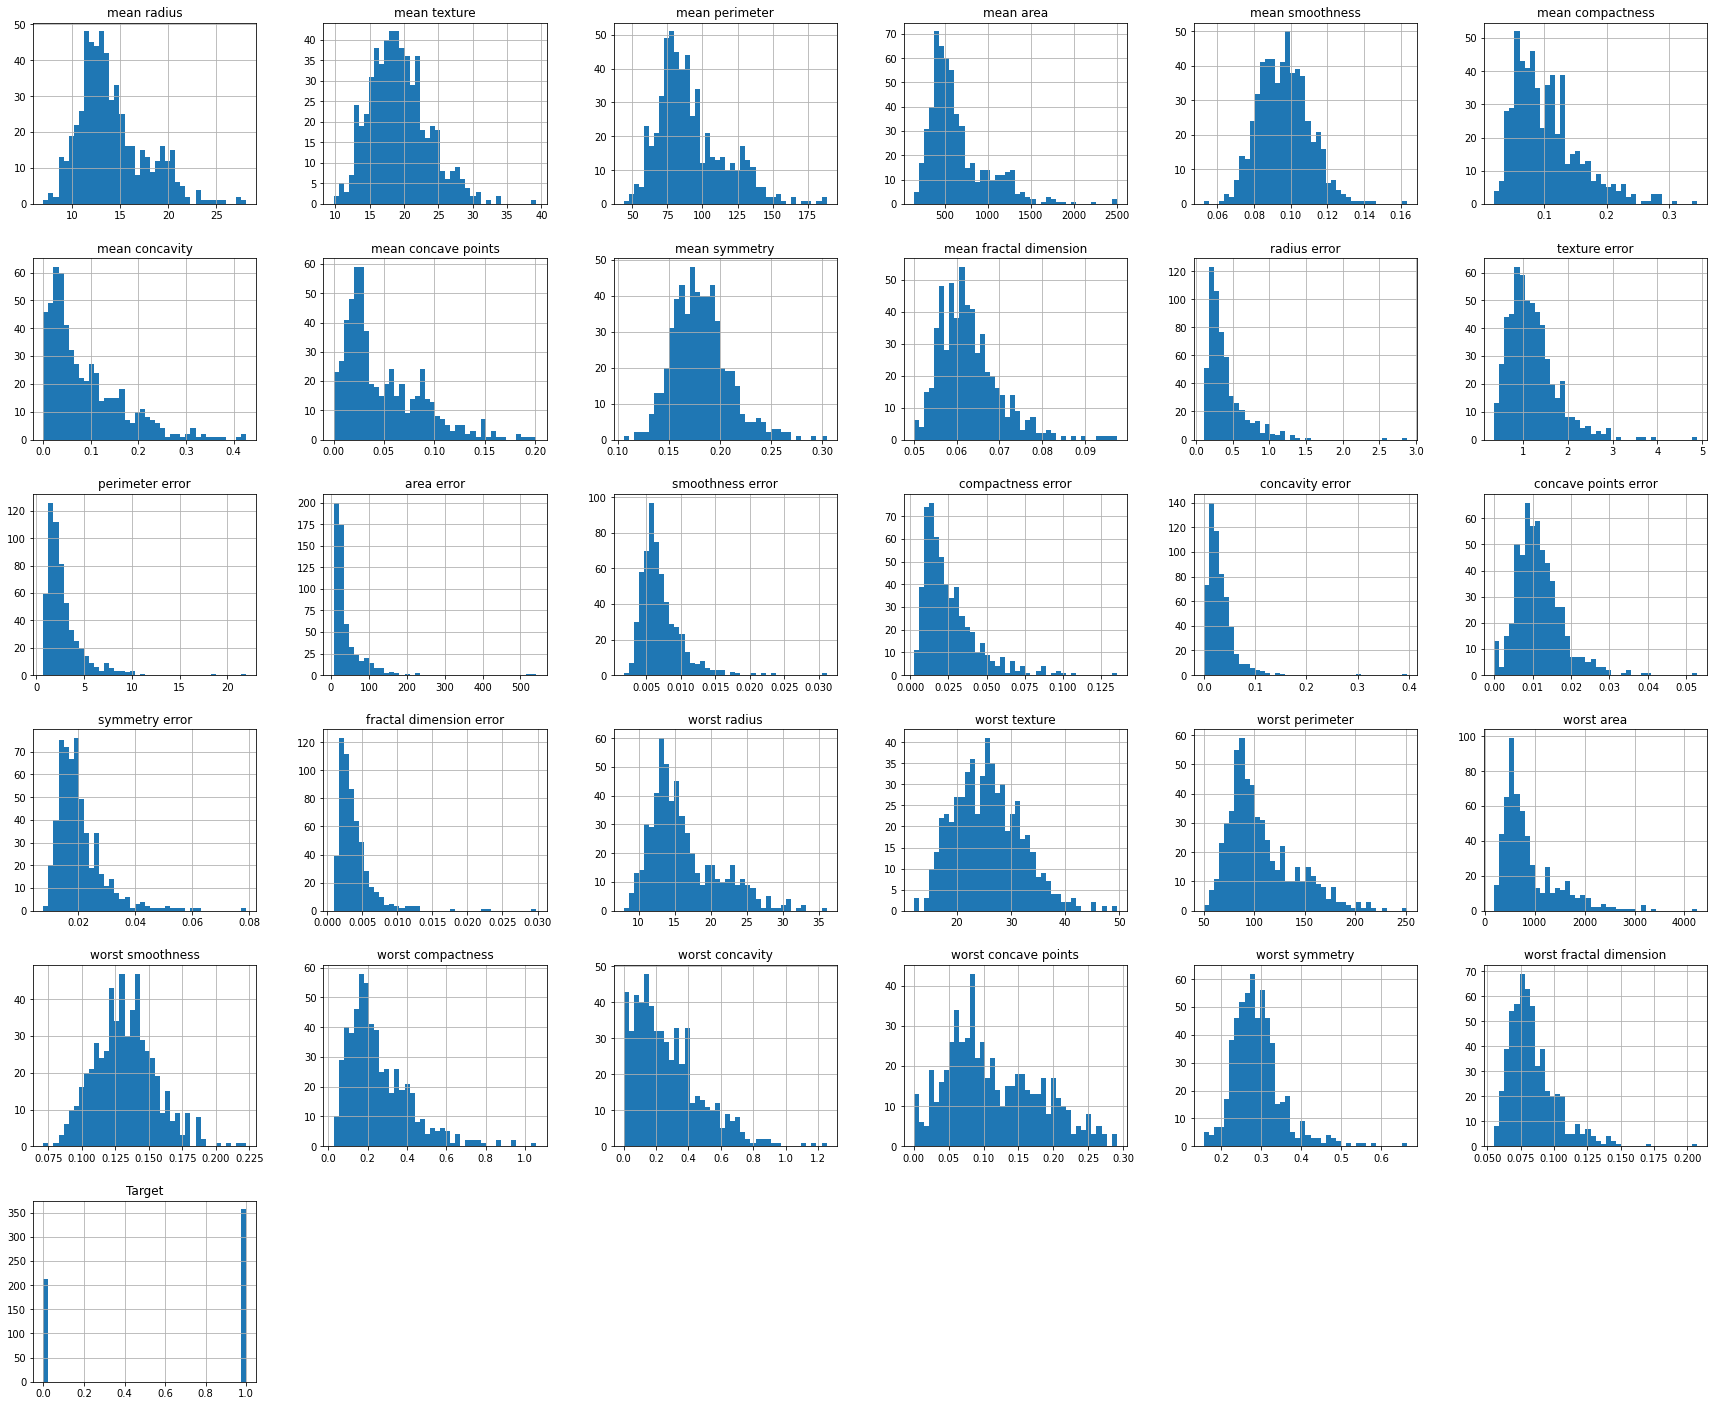

In [7]:
df.hist(bins=40, figsize=(30,25))

In [8]:
df['Target'].value_counts()

1    357
0    212
Name: Target, dtype: int64

From the above given histograms we can infer:
 

*   All features follow a near gaussian distribution, hence we don't need any transformations
*   The target class is not balanced, i.e. we have significantly more examples of the tumor being malignant. This needs to be taken care of at the time of training.



###PCA

In order to visualise this high dimensional dataset, we apply Principal Component Analysis on it and plot the results with the target as the hue.

In [9]:
pca = PCA(n_components=2)
x = pca.fit_transform(df.drop('Target', axis=1))
print(pca.explained_variance_ratio_)

[0.98204467 0.01617649]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


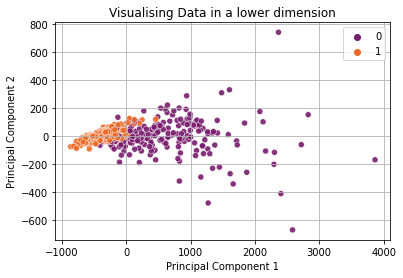

<Figure size 576x288 with 0 Axes>

In [10]:
sns.scatterplot(x[:,0], x[:,1], hue=df['Target'], alpha=0.9, palette='inferno')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualising Data in a lower dimension')
plt.legend();
plt.grid()
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.show()

We can see from the plot above that the 2 classes can be separated without very complex architectures. 

Hence we first set a baseline model using LogisticRegression and then try and improve with a RandomForestClassifier using GridSearchCV for hyperparameter tuning

We will split our dataset and stratify on the target to ensure an even representation of data in our train dataset

#EDA Summary



1.   All features are continuous and near-gaussian distributed

1.   More number of datapoints of malignant tumors when compared to non-malignant

1.  The data seems to be roughly linearly separable

1.   We will use logistic regression for baseline and random forest for improvement in classification metrics













#Stratified train-test split

In [11]:
y = df['Target']
X = df.drop('Target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

#LogisticRegression Model

Let us scale our dataset using StandardScaler(Since we will use ridge-regularisation)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We use **class_weight as 'balanced'** to compensate for the fact that the dataset had more number of data points where the tumor is malignant

We use ridge regularisation for the model to prevent over-fitting

In [13]:
logistic_reg = LogisticRegression(class_weight="balanced", penalty="l2")
logistic_reg.fit(X_train_scaled, y_train)
log_reg_y_pred = logistic_reg.predict(X_test_scaled)

#LogisticRegression Results

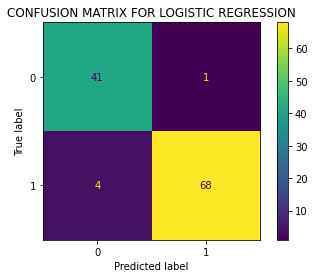

In [14]:
conf_matrix = confusion_matrix(y_test, log_reg_y_pred)
matrix_figure = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
matrix_figure.plot()
plt.title("CONFUSION MATRIX FOR LOGISTIC REGRESSION")
plt.show()

Text(0.5, 1.0, 'Precision & Recall variation with different thresholds')

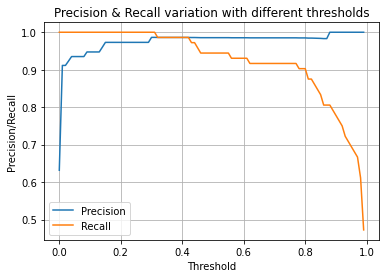

In [15]:
prob = logistic_reg.predict_proba(X_test_scaled)[:,1]
thresholds=[]
precisions=[]
recalls=[]
thresholds = np.array(thresholds)
precisions = np.array(precisions)
recalls = np.array(recalls)
for i in range(100):
  threshold = i/100
  thresholds = np.append(thresholds,np.array(threshold))
  y_pred = (prob>threshold).astype(int)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  precisions = np.append(precisions,np.array(precision))
  recalls = np.append(recalls,np.array(recall))

plt.plot(thresholds,precisions)
plt.plot(thresholds,recalls)
plt.grid()
plt.legend(["Precision", "Recall"])
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision & Recall variation with different thresholds')

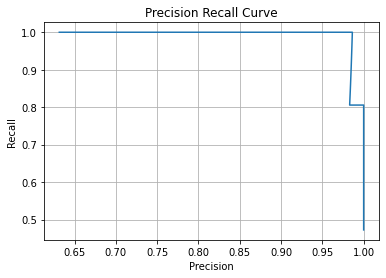

In [16]:
plt.plot(precisions,recalls)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve')
plt.grid()
plt.show()

In [17]:
print('F1 score for the logistic regression model: ', f1_score(y_test, log_reg_y_pred))

F1 score for the logistic regression model:  0.9645390070921985


Now let us try a RandomForestClassifier for improvement

#RandomForestClassifier Model using GridSearchCV



Now we will apply **GridSearchCV** on a RandomForestClassifier

In [18]:
rfc_gridcv = RandomForestClassifier(random_state=42, class_weight="balanced")

parameter_grid = {'n_estimators':[10,30,50,70,100],
                  'max_features':['auto','sqrt','log2'],
                  'max_depth':[2,4,6,8],
                  'criterion':['gini','entropy']
                 }

gridCV_rf = GridSearchCV(estimator = rfc_gridcv, param_grid = parameter_grid, cv=5)

gridCV_rf.fit(X_train,y_train)
gridCV_rf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 30}

In [19]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=30, criterion='gini', max_depth=6, max_features='log2')
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

#RandomForest Results

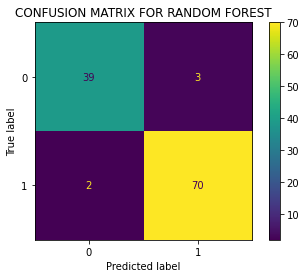

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
matrix_figure = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
matrix_figure.plot()
plt.title("CONFUSION MATRIX FOR RANDOM FOREST")
plt.show()

Text(0.5, 1.0, 'Precision & Recall variation with different thresholds')

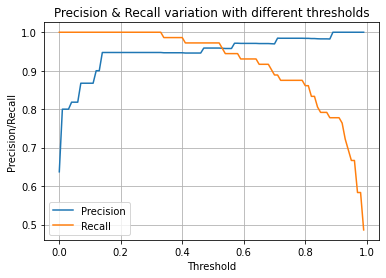

In [21]:
prob = rfc.predict_proba(X_test)[:,1]
thresholds=[]
precisions=[]
recalls=[]
thresholds = np.array(thresholds)
precisions = np.array(precisions)
recalls = np.array(recalls)
for i in range(100):
  threshold = i/100
  thresholds = np.append(thresholds,np.array(threshold))
  y_pred = (prob>threshold).astype(int)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  precisions = np.append(precisions,np.array(precision))
  recalls = np.append(recalls,np.array(recall))

plt.plot(thresholds,precisions)
plt.plot(thresholds,recalls)
plt.grid()
plt.legend(["Precision", "Recall"])
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision & Recall variation with different thresholds')

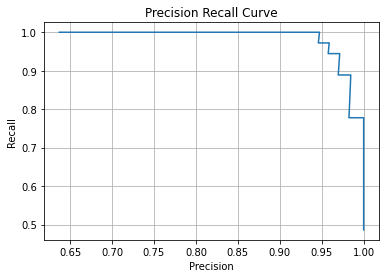

In [22]:
plt.plot(precisions,recalls)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve')
plt.grid()
plt.show()

In [23]:
print('F1 score for Random Forest: ',f1_score(y_test,y_pred))

F1 score for Random Forest:  0.6542056074766355


We see that there is not much improvement when compared to the Logistic Regression Model

 Let us try to identify important features

In [24]:
feat_importance = np.array(rfc.feature_importances_)
feat_names = np.array(X_train.columns)

Text(0, 0.5, 'Feature Name')

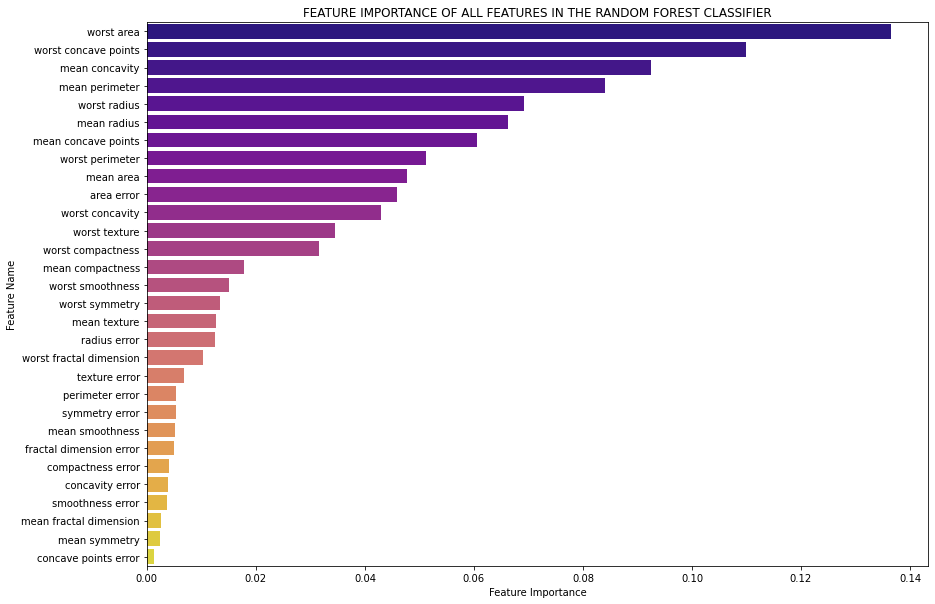

In [35]:
imp_data = {'feature_name':feat_names,'feature_importance':feat_importance}
feat_imp_df = pd.DataFrame(imp_data)
feat_imp_df.sort_values(by=['feature_importance'],ascending=False,inplace=True)

plt.figure(figsize=(14,10))
sns.barplot(x=feat_imp_df['feature_importance'], y=feat_imp_df['feature_name'], palette='plasma')
plt.title('FEATURE IMPORTANCE OF ALL FEATURES IN THE RANDOM FOREST CLASSIFIER')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')

From the above plot we can see that the most important features are:

*   Worst Area

*   Worst Concave Points

*   Mean Concavity
*   Mean Perimeter


*   Worst Radius

*   Mean Radius

*   Mean Concave Points
*   Worst Perimeter


*   Mean Area




*   Area Error







#RandomForestClassifier Model on important features

In [26]:
unimp_features = np.array(feat_imp_df['feature_name'])[10:]
X_train_reduced = X_train.drop(unimp_features,axis=1)
X_test_reduced = X_test.drop(unimp_features,axis=1)

In [27]:
rfc_red_gridcv = RandomForestClassifier(random_state=42, class_weight="balanced")

parameter_grid = {'n_estimators':[10,30,50,70,100],
                  'max_features':['auto','sqrt','log2'],
                  'max_depth':[2,4,6,8,10],
                  'criterion':['gini','entropy']
                 }

gridCV_rf_red = GridSearchCV(estimator = rfc_red_gridcv, param_grid = parameter_grid, cv=5)

gridCV_rf_red.fit(X_train_reduced,y_train)
gridCV_rf_red.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [28]:
rfc_red = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=30, criterion='gini', max_depth=8, max_features='auto')
rfc_red.fit(X_train_reduced,y_train)
y_pred_red = rfc_red.predict(X_test_reduced)

#RandomForest on important features Results

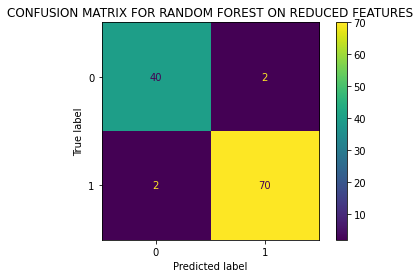

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred_red)
matrix_figure = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
matrix_figure.plot()
plt.title("CONFUSION MATRIX FOR RANDOM FOREST ON REDUCED FEATURES")
plt.show()

Text(0.5, 1.0, 'Precision & Recall variation with different thresholds')

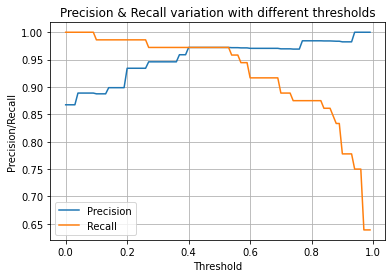

In [30]:
prob = rfc_red.predict_proba(X_test_reduced)[:,1]
thresholds=[]
precisions=[]
recalls=[]
thresholds = np.array(thresholds)
precisions = np.array(precisions)
recalls = np.array(recalls)
for i in range(100):
  threshold = i/100
  thresholds = np.append(thresholds,np.array(threshold))
  y_pred = (prob>threshold).astype(int)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  precisions = np.append(precisions,np.array(precision))
  recalls = np.append(recalls,np.array(recall))

plt.plot(thresholds,precisions)
plt.plot(thresholds,recalls)
plt.grid()
plt.legend(["Precision", "Recall"])
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision & Recall variation with different thresholds')

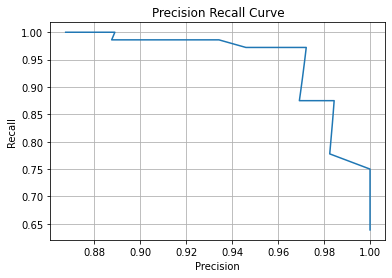

In [31]:
plt.plot(precisions,recalls)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve')
plt.grid()
plt.show()

In [33]:
print('F1 score for reduced Random Forest: ', f1_score(y_test,y_pred_red))

F1 score for reduced Random Forest:  0.9722222222222222


We see that there is a slight improvement when we remove the unimportant features.

 This shows that more features does not necessarily mean better predictive power.

#Conclusions



1.   The dataset has a simple decision boundary



2.   In the case of simple/linear decision boundaries, logistic regression is a better choice as it performs almost the same, but it takes a shorter time to train and predict when compared to an ensemble model such as the random forest.



3.   The most important features are:
  *   Worst Area
  *   Worst Concave Points
  *   Mean Concavity
  *   Mean Perimeter
  *   Worst Radius
  *   Mean Radius
  *   Mean Concave Points
  *   Worst Perimeter
  *   Mean Area
  *   Area Error


4.   Random Forest on important features performed better than the random forest trained on all the features. This shows that if irrelevant features are used, they deteriorate the model by adding noise.




